In [2]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt

In [80]:
#Memanggil data
data_jualan=pd.read_csv("Data Penjualan Toko Buku.csv")
data_jualan

,id_transaksi,jenis_item,jumlah,tanggal pembelian,nama_customer,total
0,133889.0,Alat Tulis,1,1/1/2010,Stacy Campos,120000.0
1,133889.0,Buku Sejarah,1,1/1/2010,Stacy Campos,150000.0
2,133889.0,Buku Anak-Anak,2,1/1/2010,Stacy Campos,400000.0
3,133889.0,Majalah Fashion,1,1/1/2010,Stacy Campos,130000.0
4,133889.0,Majalah Berita,2,1/1/2010,Stacy Campos,600000.0
...,...,...,...,...,...,...
3235,NaN,NaN,2,4/30/2024,NaN,240000.0
3236,NaN,NaN,6,4/30/2024,NaN,1800000.0
3237,NaN,NaN,1,4/30/2024,NaN,90000.0
3238,NaN,NaN,9,4/30/2024,NaN,180000.0


#Penjelasan Perkolom
#1. id_transaksi = nomor setiap transaksi yang telah dilakukan 
#2. jenis_item = daftar nama barang yang dibeli
#3. Jumlah = banyak nya kuantiti barang yang telah dibeli
#4. tanggal pembelian = tanggal transaksi pembeli
#5. nama_customer = nama pembeli
#6. total = total keseluruhan pembelian 

In [102]:
#melihat ukuran data
data_jualan.shape

(3240, 6)

In [104]:
#pengecekan nama kolom
data_jualan.columns.values

array(['id_transaksi', 'jenis_item', 'jumlah', 'tanggal pembelian',
       'nama_customer', 'total'], dtype=object)

In [106]:
#tipe data
data_jualan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3240 entries, 0 to 3239
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id_transaksi       3240 non-null   float64
 1   jenis_item         3240 non-null   object 
 2   jumlah             3240 non-null   int64  
 3   tanggal pembelian  3237 non-null   object 
 4   nama_customer      2469 non-null   object 
 5   total              3238 non-null   float64
dtypes: float64(2), int64(1), object(3)
memory usage: 152.0+ KB


In [116]:
#mengubah data time
data_jualan["tanggal pembelian"]= pd.to_datetime(data_jualan["tanggal pembelian"])

In [118]:
data_jualan["tanggal pembelian"].head()

0   2010-01-01
1   2010-01-01
2   2010-01-01
3   2010-01-01
4   2010-01-01
Name: tanggal pembelian, dtype: datetime64[ns]

In [120]:
#pengecekan kembali data time pada tanggal pembelian
data_jualan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3240 entries, 0 to 3239
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id_transaksi       3240 non-null   float64       
 1   jenis_item         3240 non-null   object        
 2   jumlah             3240 non-null   int64         
 3   tanggal pembelian  3240 non-null   datetime64[ns]
 4   nama_customer      3240 non-null   object        
 5   total              3240 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(2)
memory usage: 152.0+ KB


In [82]:
#pengecekan missing value
data_jualan.isna().sum()

id_transaksi         771
jenis_item           771
jumlah                 0
tanggal pembelian      3
nama_customer        771
total                  2
dtype: int64

In [108]:
#mengganti missing value yang ada dengan mode
data_jualan["id_transaksi"].fillna(data_jualan["id_transaksi"].mode()[0], inplace=True)
data_jualan["jenis_item"].fillna(data_jualan["jenis_item"].mode()[0], inplace=True)
data_jualan["tanggal pembelian"].fillna(data_jualan["tanggal pembelian"].mode()[0], inplace=True)
data_jualan["nama_customer"].fillna(data_jualan["nama_customer"].mode()[0], inplace=True)
data_jualan["total"].fillna(data_jualan["total"].mode()[0], inplace=True)

C:\Users\gilan\AppData\Local\Temp\ipykernel_14408\2598103755.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_jualan["id_transaksi"].fillna(data_jualan["id_transaksi"].mode()[0], inplace=True)
C:\Users\gilan\AppData\Local\Temp\ipykernel_14408\2598103755.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting va

In [122]:
#pengecekan kembali missing value setelah diganti dengan mode
data_jualan.isna().sum()

id_transaksi         0
jenis_item           0
jumlah               0
tanggal pembelian    0
nama_customer        0
total                0
dtype: int64

In [131]:
data_jualan

,id_transaksi,jenis_item,jumlah,tanggal pembelian,nama_customer,total
0,133889.0,Alat Tulis,1,2010-01-01,Stacy Campos,120000.0
1,133889.0,Buku Sejarah,1,2010-01-01,Stacy Campos,150000.0
2,133889.0,Buku Anak-Anak,2,2010-01-01,Stacy Campos,400000.0
3,133889.0,Majalah Fashion,1,2010-01-01,Stacy Campos,130000.0
4,133889.0,Majalah Berita,2,2010-01-01,Stacy Campos,600000.0
...,...,...,...,...,...,...
3235,134137.0,Alat Tulis,2,2024-04-30,James Brown,240000.0
3236,134137.0,Alat Tulis,6,2024-04-30,James Brown,1800000.0
3237,134137.0,Alat Tulis,1,2024-04-30,James Brown,90000.0
3238,134137.0,Alat Tulis,9,2024-04-30,James Brown,180000.0


In [144]:
#1. Pada bulan apakah pembelian tertinggi untuk majalah berita pada tahun 2021 ?
data_majalah_berita_tahunan = data_jualan.copy()

In [146]:
data_majalah_berita_tahunan = data_majalah_berita_tahunan[(data_majalah_berita_tahunan["jenis_item"]=="Majalah Berita")]
data_majalah_berita_tahunan

,id_transaksi,jenis_item,jumlah,tanggal pembelian,nama_customer,total
4,133889.0,Majalah Berita,2,2010-01-01,Stacy Campos,600000.0
9,133890.0,Majalah Berita,2,2010-05-01,Natasha Sims,480000.0
14,133891.0,Majalah Berita,2,2010-05-01,Kimberly Park,80000.0
27,133893.0,Majalah Berita,6,2010-10-29,Tiffany Cline,3240000.0
36,133895.0,Majalah Berita,3,2010-10-29,Karen Oconnell,810000.0
...,...,...,...,...,...,...
2426,134287.0,Majalah Berita,4,2024-04-30,Jessica Roberts,800000.0
2435,134288.0,Majalah Berita,8,2024-04-30,David Beasley,6400000.0
2447,134290.0,Majalah Berita,4,2024-04-30,Christopher Gonzalez,2400000.0
2460,134293.0,Majalah Berita,3,2024-04-30,Frances Pacheco,225000.0


In [152]:
data_majalah_berita_tahunan["tanggal pembelian"] = pd.to_datetime(data_majalah_berita_tahunan["tanggal pembelian"])

In [154]:
data_majalah_berita_tahunan

,id_transaksi,jenis_item,jumlah,tanggal pembelian,nama_customer,total
4,133889.0,Majalah Berita,2,2010-01-01,Stacy Campos,600000.0
9,133890.0,Majalah Berita,2,2010-05-01,Natasha Sims,480000.0
14,133891.0,Majalah Berita,2,2010-05-01,Kimberly Park,80000.0
27,133893.0,Majalah Berita,6,2010-10-29,Tiffany Cline,3240000.0
36,133895.0,Majalah Berita,3,2010-10-29,Karen Oconnell,810000.0
...,...,...,...,...,...,...
2426,134287.0,Majalah Berita,4,2024-04-30,Jessica Roberts,800000.0
2435,134288.0,Majalah Berita,8,2024-04-30,David Beasley,6400000.0
2447,134290.0,Majalah Berita,4,2024-04-30,Christopher Gonzalez,2400000.0
2460,134293.0,Majalah Berita,3,2024-04-30,Frances Pacheco,225000.0


In [158]:
data_majalah_berita_tahunan["Bulan"] = data_majalah_berita_tahunan["tanggal pembelian"].dt.month_name()

In [160]:
data_majalah_berita_tahunan

,id_transaksi,jenis_item,jumlah,tanggal pembelian,nama_customer,total,Bulan
4,133889.0,Majalah Berita,2,2010-01-01,Stacy Campos,600000.0,January
9,133890.0,Majalah Berita,2,2010-05-01,Natasha Sims,480000.0,May
14,133891.0,Majalah Berita,2,2010-05-01,Kimberly Park,80000.0,May
27,133893.0,Majalah Berita,6,2010-10-29,Tiffany Cline,3240000.0,October
36,133895.0,Majalah Berita,3,2010-10-29,Karen Oconnell,810000.0,October
...,...,...,...,...,...,...,...
2426,134287.0,Majalah Berita,4,2024-04-30,Jessica Roberts,800000.0,April
2435,134288.0,Majalah Berita,8,2024-04-30,David Beasley,6400000.0,April
2447,134290.0,Majalah Berita,4,2024-04-30,Christopher Gonzalez,2400000.0,April
2460,134293.0,Majalah Berita,3,2024-04-30,Frances Pacheco,225000.0,April


In [174]:
data_majalah_berita_tahunan_2021 = data_majalah_berita_tahunan[data_majalah_berita_tahunan["tanggal pembelian"].dt.year==2021]

In [176]:
data_majalah_berita_tahunan_2021

,id_transaksi,jenis_item,jumlah,tanggal pembelian,nama_customer,total,Bulan
1119,134072.0,Majalah Berita,5,2021-01-16,Angela Oconnor,1500000.0,January
1130,134074.0,Majalah Berita,5,2021-01-16,Eric Owen,1250000.0,January
1161,134078.0,Majalah Berita,2,2021-01-16,Laura Wiley,440000.0,January
1175,134080.0,Majalah Berita,3,2021-02-25,Dr. Cassandra Williams,60000.0,February
1179,134081.0,Majalah Berita,7,2021-02-25,Sandra Guerrero,140000.0,February
1184,134082.0,Majalah Berita,7,2021-03-21,Carla Prince,5390000.0,March
1190,134083.0,Majalah Berita,8,2021-03-21,Caitlin Adams,1600000.0,March
1194,134084.0,Majalah Berita,2,2021-03-21,Molly Hernandez,80000.0,March
1201,134085.0,Majalah Berita,6,2021-03-21,Rebecca Nelson,3600000.0,March
1226,134089.0,Majalah Berita,4,2021-07-08,James Brooks,2400000.0,July


In [178]:
total_perbulan_2021 = data_majalah_berita_tahunan_2021.groupby("Bulan").agg(
jumlah_order_bulan_2021 = ("jumlah","sum"),
jumlah_total_bulan_2021 = ("total", "sum")
).reindex(['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])

In [180]:
total_perbulan_2021

,jumlah_order_bulan_2021,jumlah_total_bulan_2021
Bulan,,
January,12.0,3190000.0
February,10.0,200000.0
March,23.0,10670000.0
April,NaN,NaN
May,NaN,NaN
June,NaN,NaN
July,32.0,14440000.0
August,NaN,NaN
September,2.0,80000.0


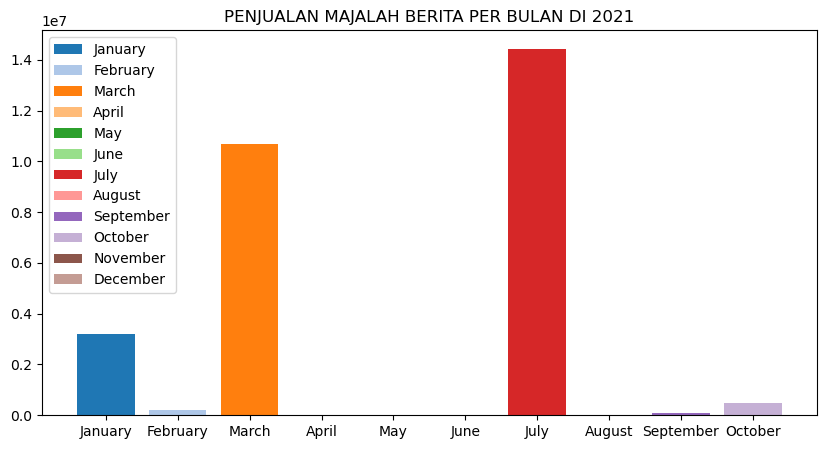

In [188]:
# bikin canvas
plt.figure(figsize=(10,5))

#seting warna
colors = plt.cm.tab20.colors

#setting barnya
plt.bar(total_perbulan_2021.index, total_perbulan_2021["jumlah_total_bulan_2021"],  label=total_perbulan_2021.index, color=colors[:len(total_perbulan_2021.index)])
plt.legend(total_perbulan_2021.index)
plt.title("PENJUALAN MAJALAH BERITA PER BULAN DI 2021")
plt.show()

In [ ]:
Penjualan tertinggi buku majalah berita pada tahun 2021 adalah bulan july

In [190]:
#2. Mana yang lebih unggul dari penjualan buku sejarah dan buku biografi ? 
data_buku_sejarah = data_jualan.copy()

In [194]:
data_buku_sejarah = data_buku_sejarah[(data_buku_sejarah["jenis_item"]=="Buku Sejarah")]
data_buku_sejarah

,id_transaksi,jenis_item,jumlah,tanggal pembelian,nama_customer,total
1,133889.0,Buku Sejarah,1,2010-01-01,Stacy Campos,150000.0
23,133893.0,Buku Sejarah,1,2010-06-27,Tiffany Cline,100000.0
41,133896.0,Buku Sejarah,2,2010-10-29,Rebecca English,400000.0
57,133899.0,Buku Sejarah,9,2011-05-17,Tami Townsend MD,12150000.0
76,133902.0,Buku Sejarah,8,2011-08-28,Lisa Jenkins,1280000.0
...,...,...,...,...,...,...
2410,134285.0,Buku Sejarah,7,2024-04-30,Mary Andrade,5390000.0
2424,134287.0,Buku Sejarah,5,2024-04-30,Jessica Roberts,3250000.0
2432,134288.0,Buku Sejarah,1,2024-04-30,David Beasley,90000.0
2444,134290.0,Buku Sejarah,8,2024-04-30,Christopher Gonzalez,9600000.0


In [196]:
data_buku_sejarah["Bulan"] = data_buku_sejarah["tanggal pembelian"].dt.month_name()
data_buku_sejarah

C:\Users\gilan\AppData\Local\Temp\ipykernel_14408\1109824354.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_buku_sejarah["Bulan"] = data_buku_sejarah["tanggal pembelian"].dt.month_name()


,id_transaksi,jenis_item,jumlah,tanggal pembelian,nama_customer,total,Bulan
1,133889.0,Buku Sejarah,1,2010-01-01,Stacy Campos,150000.0,January
23,133893.0,Buku Sejarah,1,2010-06-27,Tiffany Cline,100000.0,June
41,133896.0,Buku Sejarah,2,2010-10-29,Rebecca English,400000.0,October
57,133899.0,Buku Sejarah,9,2011-05-17,Tami Townsend MD,12150000.0,May
76,133902.0,Buku Sejarah,8,2011-08-28,Lisa Jenkins,1280000.0,August
...,...,...,...,...,...,...,...
2410,134285.0,Buku Sejarah,7,2024-04-30,Mary Andrade,5390000.0,April
2424,134287.0,Buku Sejarah,5,2024-04-30,Jessica Roberts,3250000.0,April
2432,134288.0,Buku Sejarah,1,2024-04-30,David Beasley,90000.0,April
2444,134290.0,Buku Sejarah,8,2024-04-30,Christopher Gonzalez,9600000.0,April


In [200]:
data_buku_sejarah["Tahun"] = data_buku_sejarah["tanggal pembelian"].dt.year
data_buku_sejarah

C:\Users\gilan\AppData\Local\Temp\ipykernel_14408\1240412860.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_buku_sejarah["Tahun"] = data_buku_sejarah["tanggal pembelian"].dt.year


,id_transaksi,jenis_item,jumlah,tanggal pembelian,nama_customer,total,Bulan,Tahun
1,133889.0,Buku Sejarah,1,2010-01-01,Stacy Campos,150000.0,January,2010
23,133893.0,Buku Sejarah,1,2010-06-27,Tiffany Cline,100000.0,June,2010
41,133896.0,Buku Sejarah,2,2010-10-29,Rebecca English,400000.0,October,2010
57,133899.0,Buku Sejarah,9,2011-05-17,Tami Townsend MD,12150000.0,May,2011
76,133902.0,Buku Sejarah,8,2011-08-28,Lisa Jenkins,1280000.0,August,2011
...,...,...,...,...,...,...,...,...
2410,134285.0,Buku Sejarah,7,2024-04-30,Mary Andrade,5390000.0,April,2024
2424,134287.0,Buku Sejarah,5,2024-04-30,Jessica Roberts,3250000.0,April,2024
2432,134288.0,Buku Sejarah,1,2024-04-30,David Beasley,90000.0,April,2024
2444,134290.0,Buku Sejarah,8,2024-04-30,Christopher Gonzalez,9600000.0,April,2024


In [202]:
penghasilan_buku_sejarah = data_buku_sejarah.groupby("Bulan").agg(
total_order = ("jumlah","sum"),
total_pendapatan = ("total","sum")
).reindex(['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])

In [204]:
penghasilan_buku_sejarah

,total_order,total_pendapatan
Bulan,,
January,119,53305000.0
February,22,5155000.0
March,23,6950000.0
April,247,136125000.0
May,238,118625000.0
June,1,100000.0
July,106,54490000.0
August,65,47695000.0
September,17,8965000.0


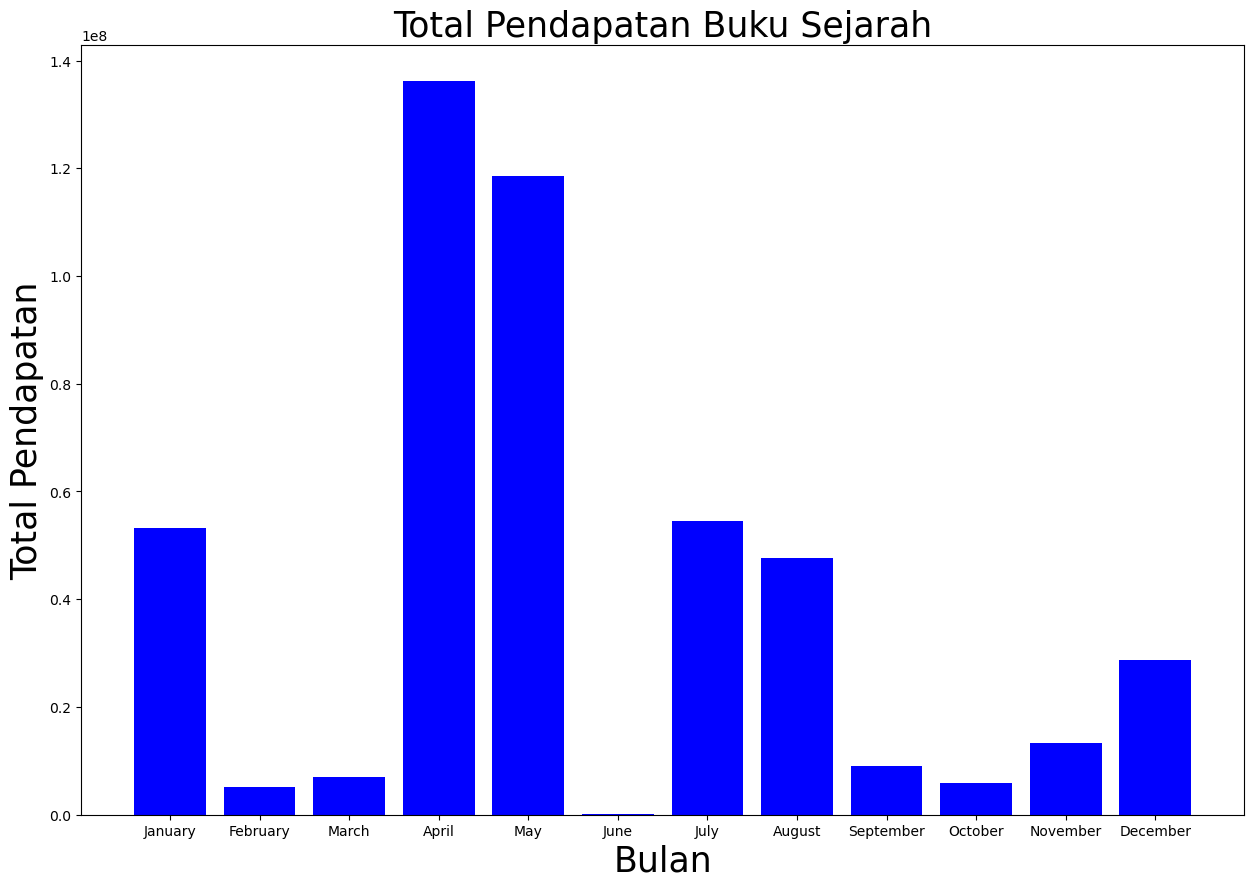

In [354]:
plt.figure(figsize=(15,10))

plt.bar(penghasilan_buku_sejarah.index,penghasilan_buku_sejarah ["total_pendapatan"], label="Total Pendapatan Buku Sejarah", color="blue")
plt.title("Total Pendapatan Buku Sejarah",fontsize=25)

#label untuk X dan Y
plt.xlabel("Bulan",fontsize=25)
plt.ylabel("Total Pendapatan",fontsize=25)
plt.show()

In [208]:
data_buku_biografi = data_jualan.copy()

In [210]:
data_buku_biografi = data_buku_biografi[(data_buku_biografi["jenis_item"]=="Buku Biografi")]
data_buku_biografi

,id_transaksi,jenis_item,jumlah,tanggal pembelian,nama_customer,total
10,133890.0,Buku Biografi,2,2010-05-01,Natasha Sims,100000.0
33,133894.0,Buku Biografi,1,2010-10-29,James Brown,25000.0
39,133895.0,Buku Biografi,5,2010-10-29,Karen Oconnell,100000.0
46,133896.0,Buku Biografi,5,2011-01-20,Rebecca English,500000.0
54,133898.0,Buku Biografi,4,2011-05-17,Derek Mendez,320000.0
...,...,...,...,...,...,...
2401,134283.0,Buku Biografi,2,2024-04-30,Jane Fisher,360000.0
2407,134284.0,Buku Biografi,5,2024-04-30,Amanda Byrd,2750000.0
2429,134287.0,Buku Biografi,9,2024-04-30,Jessica Roberts,180000.0
2437,134288.0,Buku Biografi,3,2024-04-30,David Beasley,180000.0


In [212]:
data_buku_biografi["Bulan"] = data_buku_biografi["tanggal pembelian"].dt.month_name()
data_buku_biografi

,id_transaksi,jenis_item,jumlah,tanggal pembelian,nama_customer,total,Bulan
10,133890.0,Buku Biografi,2,2010-05-01,Natasha Sims,100000.0,May
33,133894.0,Buku Biografi,1,2010-10-29,James Brown,25000.0,October
39,133895.0,Buku Biografi,5,2010-10-29,Karen Oconnell,100000.0,October
46,133896.0,Buku Biografi,5,2011-01-20,Rebecca English,500000.0,January
54,133898.0,Buku Biografi,4,2011-05-17,Derek Mendez,320000.0,May
...,...,...,...,...,...,...,...
2401,134283.0,Buku Biografi,2,2024-04-30,Jane Fisher,360000.0,April
2407,134284.0,Buku Biografi,5,2024-04-30,Amanda Byrd,2750000.0,April
2429,134287.0,Buku Biografi,9,2024-04-30,Jessica Roberts,180000.0,April
2437,134288.0,Buku Biografi,3,2024-04-30,David Beasley,180000.0,April


In [214]:
data_buku_biografi["Tahun"] = data_buku_biografi["tanggal pembelian"].dt.year
data_buku_biografi

,id_transaksi,jenis_item,jumlah,tanggal pembelian,nama_customer,total,Bulan,Tahun
10,133890.0,Buku Biografi,2,2010-05-01,Natasha Sims,100000.0,May,2010
33,133894.0,Buku Biografi,1,2010-10-29,James Brown,25000.0,October,2010
39,133895.0,Buku Biografi,5,2010-10-29,Karen Oconnell,100000.0,October,2010
46,133896.0,Buku Biografi,5,2011-01-20,Rebecca English,500000.0,January,2011
54,133898.0,Buku Biografi,4,2011-05-17,Derek Mendez,320000.0,May,2011
...,...,...,...,...,...,...,...,...
2401,134283.0,Buku Biografi,2,2024-04-30,Jane Fisher,360000.0,April,2024
2407,134284.0,Buku Biografi,5,2024-04-30,Amanda Byrd,2750000.0,April,2024
2429,134287.0,Buku Biografi,9,2024-04-30,Jessica Roberts,180000.0,April,2024
2437,134288.0,Buku Biografi,3,2024-04-30,David Beasley,180000.0,April,2024


In [216]:
penghasilan_buku_biografi = data_buku_biografi.groupby("Bulan").agg(
total_order = ("jumlah","sum"),
total_pendapatan = ("total","sum")
).reindex(['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])

In [218]:
penghasilan_buku_biografi

,total_order,total_pendapatan
Bulan,,
January,114,27055000.0
February,48,20290000.0
March,35,16005000.0
April,238,126710000.0
May,311,150690000.0
June,17,4820000.0
July,109,45190000.0
August,30,13070000.0
September,22,8220000.0


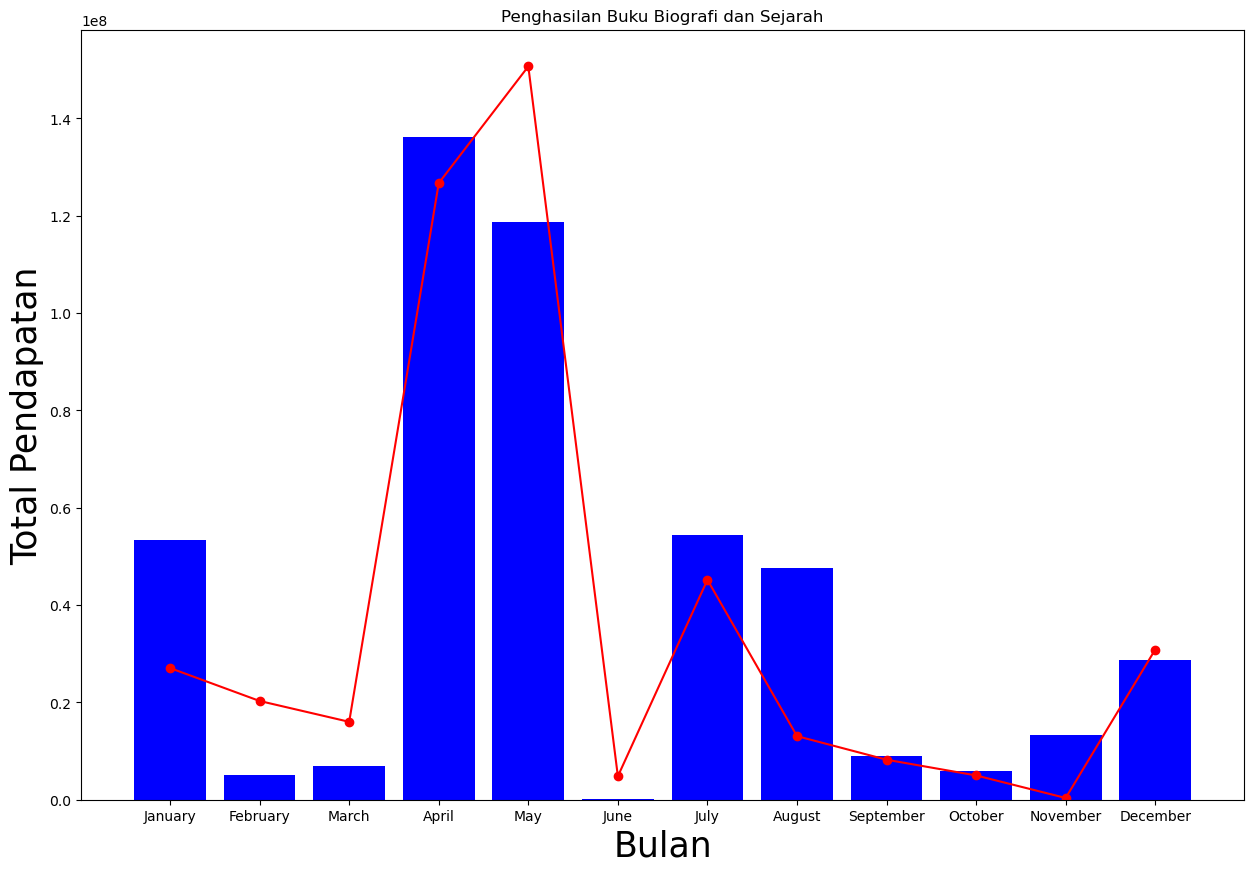

In [352]:
plt.figure(figsize=(15,10))

plt.bar(penghasilan_buku_sejarah.index,penghasilan_buku_sejarah ["total_pendapatan"], label="Total Pendapatan Buku Sejarah", color="blue")

plt.title("Penghasilan Buku Biografi dan Sejarah")

plt.plot(penghasilan_buku_biografi["total_pendapatan"],
         label="Total Order Buku Biografi",
         marker="o",
         linestyle="-",
         color="red")

#label untuk X dan Y
plt.xlabel("Bulan",fontsize=25)
plt.ylabel("Total Pendapatan",fontsize=25)
plt.show()

In [ ]:
Antara buku sejarah dan biografi yang terbanyak dalam pendapatan adalah buku Sejarah 

In [ ]:
#3. Dibulan apa saja setiap produk buku sejarah dan biografi mengalami kenaikan ?
buku sejarah = april, juli,dan desember
buku biografi = april, may, juli, desember

In [228]:
#4. pada tahun 2012, pada bulan apa penjualan tertinggi alat tulis ? 
data_alat_tulis_tahunan = data_jualan.copy()

In [230]:
data_alat_tulis_tahunan = data_alat_tulis_tahunan[(data_alat_tulis_tahunan["jenis_item"]=="Alat Tulis")]
data_alat_tulis_tahunan

,id_transaksi,jenis_item,jumlah,tanggal pembelian,nama_customer,total
0,133889.0,Alat Tulis,1,2010-01-01,Stacy Campos,120000.0
7,133890.0,Alat Tulis,1,2010-03-03,Natasha Sims,130000.0
22,133893.0,Alat Tulis,2,2010-06-27,Tiffany Cline,400000.0
30,133894.0,Alat Tulis,7,2010-10-29,James Brown,1225000.0
42,133896.0,Alat Tulis,3,2010-10-29,Rebecca English,900000.0
...,...,...,...,...,...,...
3235,134137.0,Alat Tulis,2,2024-04-30,James Brown,240000.0
3236,134137.0,Alat Tulis,6,2024-04-30,James Brown,1800000.0
3237,134137.0,Alat Tulis,1,2024-04-30,James Brown,90000.0
3238,134137.0,Alat Tulis,9,2024-04-30,James Brown,180000.0


In [232]:
data_alat_tulis_tahunan["Bulan"] = data_alat_tulis_tahunan["tanggal pembelian"].dt.month_name()
data_alat_tulis_tahunan

,id_transaksi,jenis_item,jumlah,tanggal pembelian,nama_customer,total,Bulan
0,133889.0,Alat Tulis,1,2010-01-01,Stacy Campos,120000.0,January
7,133890.0,Alat Tulis,1,2010-03-03,Natasha Sims,130000.0,March
22,133893.0,Alat Tulis,2,2010-06-27,Tiffany Cline,400000.0,June
30,133894.0,Alat Tulis,7,2010-10-29,James Brown,1225000.0,October
42,133896.0,Alat Tulis,3,2010-10-29,Rebecca English,900000.0,October
...,...,...,...,...,...,...,...
3235,134137.0,Alat Tulis,2,2024-04-30,James Brown,240000.0,April
3236,134137.0,Alat Tulis,6,2024-04-30,James Brown,1800000.0,April
3237,134137.0,Alat Tulis,1,2024-04-30,James Brown,90000.0,April
3238,134137.0,Alat Tulis,9,2024-04-30,James Brown,180000.0,April


In [262]:
data_alat_tulis_tahunan_2012 = data_alat_tulis_tahunan[data_alat_tulis_tahunan["tanggal pembelian"].dt.year==2012]
data_alat_tulis_tahunan_2012

,id_transaksi,jenis_item,jumlah,tanggal pembelian,nama_customer,total,Bulan,Tahun
89,133905.0,Alat Tulis,9,2012-01-25,Elizabeth Burns,12150000.0,January,2012
97,133906.0,Alat Tulis,8,2012-01-25,John Calhoun,1280000.0,January,2012
101,133907.0,Alat Tulis,3,2012-01-25,Sarah Moore,450000.0,January,2012
107,133908.0,Alat Tulis,5,2012-07-31,Tabitha Dixon,2500000.0,July,2012
111,133909.0,Alat Tulis,9,2012-07-31,Ronnie Wells,2025000.0,July,2012
119,133910.0,Alat Tulis,7,2012-07-31,Julia King,2450000.0,July,2012
127,133911.0,Alat Tulis,1,2012-07-31,Pam Rios,20000.0,July,2012
135,133912.0,Alat Tulis,3,2012-07-31,Elizabeth Dean,1350000.0,July,2012
146,133915.0,Alat Tulis,2,2012-09-30,Courtney Terry,520000.0,September,2012
159,133917.0,Alat Tulis,1,2012-10-24,James Burnett,50000.0,October,2012


In [264]:
penghasilan_alat_tulis_2012 = data_alat_tulis_tahunan_2012.groupby("Bulan").agg(
total_order = ("jumlah","sum"),
total_pendapatan = ("total","sum")
).reindex(['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])

In [266]:
penghasilan_alat_tulis_2012

,total_order,total_pendapatan
Bulan,,
January,20.0,13880000.0
February,NaN,NaN
March,NaN,NaN
April,NaN,NaN
May,NaN,NaN
June,NaN,NaN
July,25.0,8345000.0
August,NaN,NaN
September,2.0,520000.0


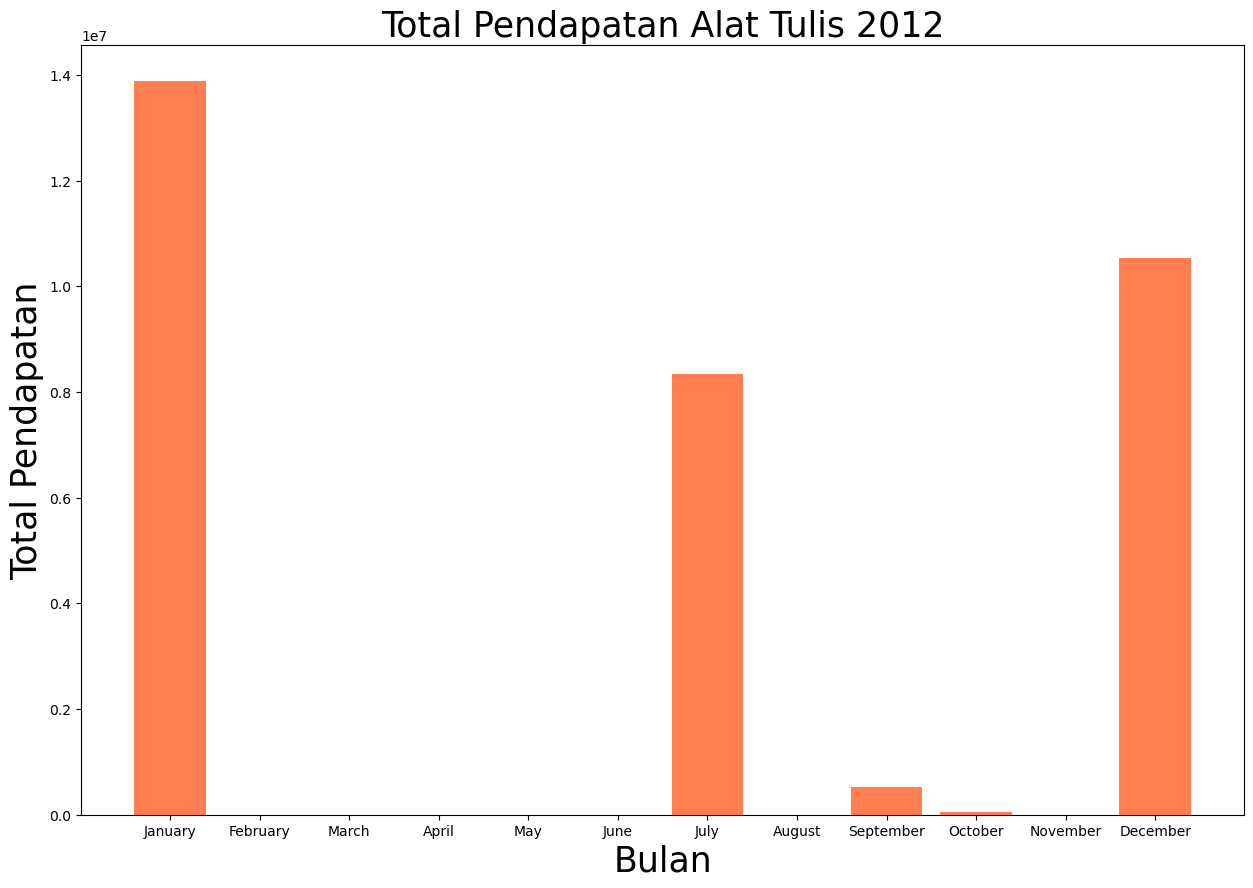

In [346]:
plt.figure(figsize=(15,10))

plt.bar(penghasilan_alat_tulis_2012.index,penghasilan_alat_tulis_2012["total_pendapatan"], label="Total Pendapatan Alat Tulis 2012", color="coral")
plt.title("Total Pendapatan Alat Tulis 2012",fontsize=25)

#label untuk X dan Y
plt.xlabel("Bulan",fontsize=25)
plt.ylabel("Total Pendapatan",fontsize=25)
plt.show()

In [ ]:
Pembelian alat tulis pada tahun 2012 tertinggi ada di bulan januari

In [ ]:
#5. pada tahun berapa buku fiksi mengalami pendapatan tertinggi ? 

In [304]:
data_buku_fiksi = data_jualan.copy()

In [306]:
data_buku_fiksi = data_buku_fiksi[(data_buku_fiksi["jenis_item"]=="Buku Fiksi")]
data_buku_fiksi

,id_transaksi,jenis_item,jumlah,tanggal pembelian,nama_customer,total
5,133889.0,Buku Fiksi,3,2010-01-01,Stacy Campos,1170000.0
20,133892.0,Buku Fiksi,5,2010-05-01,Jonathan Edwards,2750000.0
62,133899.0,Buku Fiksi,7,2011-05-17,Tami Townsend MD,2450000.0
95,133905.0,Buku Fiksi,3,2012-01-25,Elizabeth Burns,810000.0
123,133910.0,Buku Fiksi,5,2012-07-31,Julia King,100000.0
...,...,...,...,...,...,...
2436,134288.0,Buku Fiksi,9,2024-04-30,David Beasley,2025000.0
2441,134289.0,Buku Fiksi,5,2024-04-30,Molly Buckley,3750000.0
2449,134291.0,Buku Fiksi,2,2024-04-30,Nicholas Smith,240000.0
2455,134292.0,Buku Fiksi,6,2024-04-30,Christine Frazier,120000.0


In [308]:
data_buku_fiksi["Bulan"] = data_buku_fiksi["tanggal pembelian"].dt.month_name()
data_buku_fiksi

,id_transaksi,jenis_item,jumlah,tanggal pembelian,nama_customer,total,Bulan
5,133889.0,Buku Fiksi,3,2010-01-01,Stacy Campos,1170000.0,January
20,133892.0,Buku Fiksi,5,2010-05-01,Jonathan Edwards,2750000.0,May
62,133899.0,Buku Fiksi,7,2011-05-17,Tami Townsend MD,2450000.0,May
95,133905.0,Buku Fiksi,3,2012-01-25,Elizabeth Burns,810000.0,January
123,133910.0,Buku Fiksi,5,2012-07-31,Julia King,100000.0,July
...,...,...,...,...,...,...,...
2436,134288.0,Buku Fiksi,9,2024-04-30,David Beasley,2025000.0,April
2441,134289.0,Buku Fiksi,5,2024-04-30,Molly Buckley,3750000.0,April
2449,134291.0,Buku Fiksi,2,2024-04-30,Nicholas Smith,240000.0,April
2455,134292.0,Buku Fiksi,6,2024-04-30,Christine Frazier,120000.0,April


In [310]:
data_buku_fiksi["Tahun"] =data_buku_fiksi["tanggal pembelian"].dt.year
data_buku_fiksi

,id_transaksi,jenis_item,jumlah,tanggal pembelian,nama_customer,total,Bulan,Tahun
5,133889.0,Buku Fiksi,3,2010-01-01,Stacy Campos,1170000.0,January,2010
20,133892.0,Buku Fiksi,5,2010-05-01,Jonathan Edwards,2750000.0,May,2010
62,133899.0,Buku Fiksi,7,2011-05-17,Tami Townsend MD,2450000.0,May,2011
95,133905.0,Buku Fiksi,3,2012-01-25,Elizabeth Burns,810000.0,January,2012
123,133910.0,Buku Fiksi,5,2012-07-31,Julia King,100000.0,July,2012
...,...,...,...,...,...,...,...,...
2436,134288.0,Buku Fiksi,9,2024-04-30,David Beasley,2025000.0,April,2024
2441,134289.0,Buku Fiksi,5,2024-04-30,Molly Buckley,3750000.0,April,2024
2449,134291.0,Buku Fiksi,2,2024-04-30,Nicholas Smith,240000.0,April,2024
2455,134292.0,Buku Fiksi,6,2024-04-30,Christine Frazier,120000.0,April,2024


In [332]:
penghasilan_buku_fiksi = data_buku_fiksi.groupby("Tahun").agg(
total_order = ("jumlah","sum"),
total_pendapatan = ("total","sum")
).reindex([2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2022, 2023, 2024])

In [334]:
penghasilan_buku_fiksi

,total_order,total_pendapatan
Tahun,,
2010,8,3920000.0
2011,7,2450000.0
2012,25,11200000.0
2013,26,14120000.0
2014,34,23875000.0
2015,64,38150000.0
2016,105,62895000.0
2017,38,19000000.0
2018,51,14935000.0


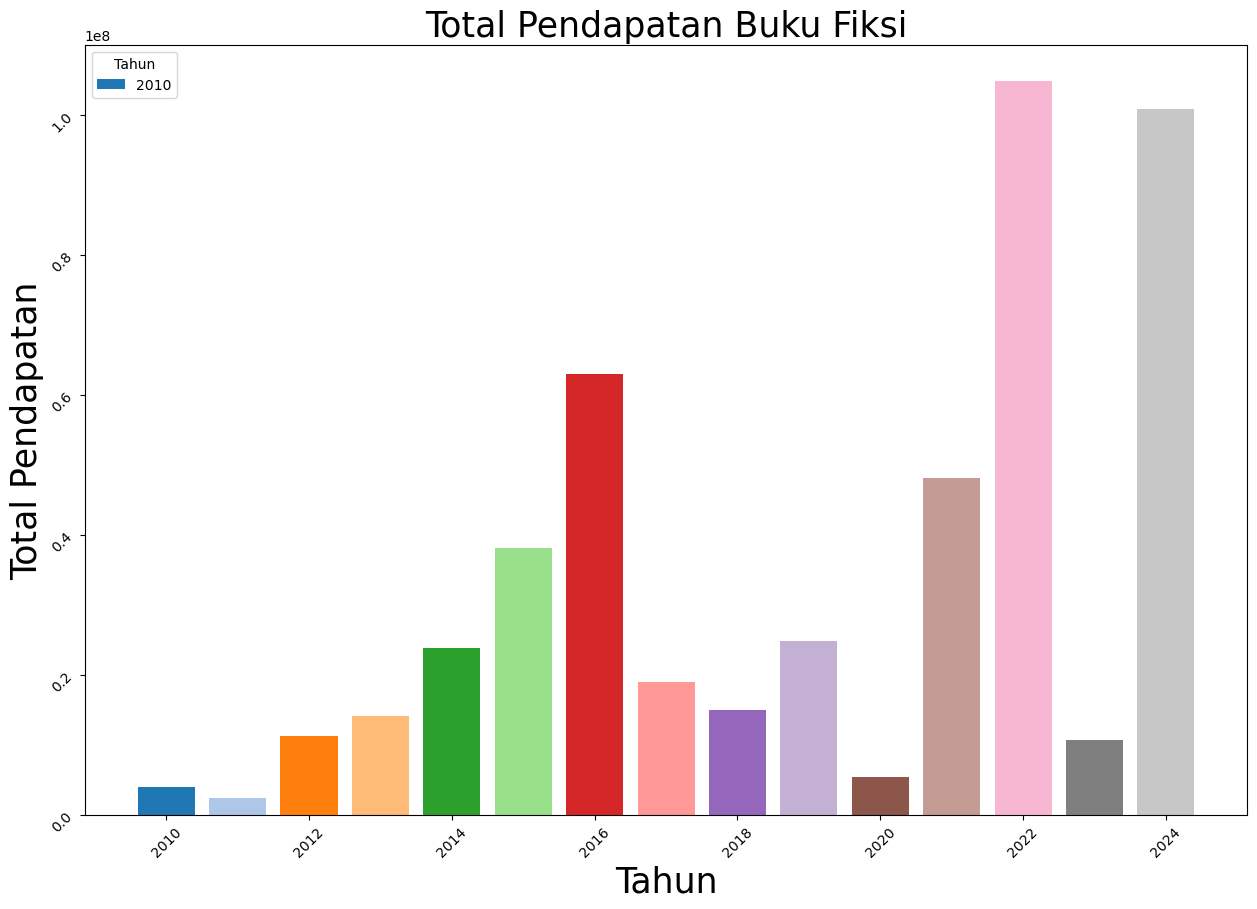

In [344]:
plt.figure(figsize=(15,10))

colors = plt.cm.tab20.colors

plt.bar(penghasilan_buku_fiksi.index,penghasilan_buku_fiksi["total_pendapatan"], label="Total Pendapatan Buku Fiksi", color=colors[:len(penghasilan_buku_fiksi.index)])

plt.title("Total Pendapatan Buku Fiksi",fontsize=25)

#label untuk X dan Y
plt.xlabel("Tahun",fontsize=25)
plt.ylabel("Total Pendapatan",fontsize=25)

#kasih rotasi (opsional)
plt.xticks(rotation=45)
plt.yticks(rotation=45)

#aktifkan si legend
plt.legend(penghasilan_buku_fiksi.index,title="Tahun", loc="upper left")
plt.show()

In [ ]:
Pendapatan tertinggi untuk buku fiksi ada di tahun 2022